In [ ]:
#@title ライブラリのインポート

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm



ライブラリのバージョンの確認方法
```
# OpenCVのバージョン
import cv2
print(f"OpenCV (cv2) バージョン: {cv2.__version__}")

# NumPyのバージョン
import numpy as np
print(f"NumPy バージョン: {np.__version__}")

# Matplotlibのバージョン
import matplotlib
print(f"Matplotlib バージョン: {matplotlib.__version__}")

# tqdmのバージョン
import tqdm
print(f"tqdm バージョン: {tqdm.__version__}")
```

```
OpenCV (cv2) バージョン: 4.10.0
NumPy バージョン: 1.26.4
Matplotlib バージョン: 3.10.0
tqdm バージョン: 4.67.1
```

# 動画データの読み込み

下記のURLから動画ファイルをダウンロードしてください。サイズは1280×720にしてください。ダウンロード後、Google Colabにアップロードしてください。



**[動画のURL](https://pixabay.com/ja/videos/%E4%BA%BA-%E5%95%86%E6%A5%AD-%E5%BA%97-%E5%BF%99%E3%81%97%E3%81%84-%E3%83%A2%E3%83%BC%E3%83%AB-6387/)**



> <a href="https://pixabay.com/ja//?utm_source=link-attribution&utm_medium=referral&utm_campaign=video&utm_content=6387">Pixabay</a>が提供する<a href="https://pixabay.com/ja/users/coverr-free-footage-1281706/?utm_source=link-attribution&utm_medium=referral&utm_campaign=video&utm_content=6387">Coverr-Free-Footage</a>の動画



In [ ]:
#@title 動画ファイルのパスの指定

test_mv = '/content/6387-191695740_medium.mp4' # @param {type:"string"}

In [ ]:
#@title 動画データの読み込み

cap = cv2.VideoCapture(test_mv)

In [ ]:
#@title 動画データのプロパティを取得

# 幅
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'幅： {w}')
# 高さ
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(f'高さ： {h}')
# 総フレーム数
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f'フレーム数： {count}')
# fps
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS： {fps}')
# 秒数
sec = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
print(f'時間： {sec}sec')

幅： 1280.0
高さ： 720.0
フレーム数： 341.0
FPS： 25.0
時間： 13.64sec


In [ ]:
#@title コーデックの取得

fourcc_int = int(cap.get(cv2.CAP_PROP_FOURCC))
print(f'コーデック： {"".join([chr((fourcc_int >> 8 * i) & 0xFF) for i in range(4)])}')

コーデック： h264


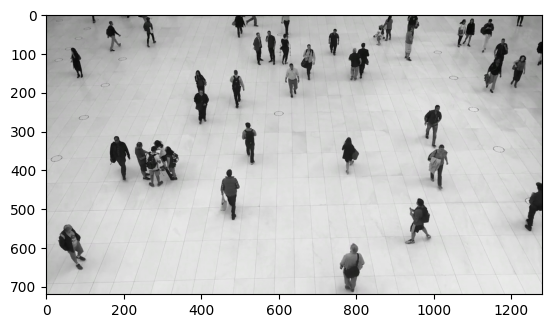

In [ ]:
#@title 特定のフレームの抽出方法

target_frame = 10  # 抽出したいフレームのインデックス（番号）
cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)  # 任意のフレームを指定
ret, frame = cap.read()

plt.imshow(frame[:,:,::-1])

In [ ]:
#@title 処理設定

START_TIME = 0.4
END_TIME = 3.4
FREQ_TIME = 0.2 # fps*FREQ_TIMEが整数になるように設定

freq_frame = int(fps*FREQ_TIME)

In [ ]:
#@title 動画書き出し設定

output_movie_path = 'output.mp4'
frame_rate = freq_frame # フレームレート
size = (640, 480) # 動画の画面サイズ
fmt = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') # コーデック(MPEG-4)
font = cv2.FONT_HERSHEY_DUPLEX
writer = cv2.VideoWriter(output_movie_path, fmt, frame_rate, size) # ライター作成

if not writer.isOpened():
    print("can't be opened")

In [ ]:
#@title リサイズおよび書き出し

for i in tqdm(range(int(fps*START_TIME), int(fps*END_TIME))):
  if i%freq_frame==0:
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if not ret:
      break
    # 画像処理
    frame = cv2.resize(frame, (640,480))
    cv2.putText(frame, f"frame: {str(i)}", (50,50), font, 1, (0,0,255), 2, cv2.LINE_AA)

    writer.write(frame) # 書き込み
writer.release() # ファイルを閉じる

  0%|          | 0/75 [00:00<?, ?it/s]